# PyWheat

Python library for simulation of wheat phenological development, crop growth and yield.

Author:
* **Ernesto Giron Echeverry** (Independent Researcher, e.giron.e@gmail.com)

Last updated: October 11, 2023


In [1]:
# Install library
#!pip install pywheat

## Load Libraries

In [1]:
import os, sys, gc
import pandas as pd
pd.set_option('display.max_columns', None)

# Load PyWheat library
import pywheat

print(pywheat.__version__)


PyWheat version 0.0.5


## Load example dataset

In [2]:
from pywheat.data import load_dataset

# Load Kansas data
data = load_dataset()
data['Weather']

Loading example weather dataset 
from Kansas State University (Wagger,M.G. 1983) stored in DSSAT v4.8.


,DATE,SRAD,TMAX,TMIN,RAIN
0,1981-10-01,18.9,23.3,10.0,0.0
1,1981-10-02,18.2,22.2,5.6,0.0
2,1981-10-03,2.4,16.7,11.1,0.3
3,1981-10-04,13.8,26.1,12.8,34.0
4,1981-10-05,12.1,26.7,15.6,0.0
...,...,...,...,...,...
299,1982-07-27,19.9,31.7,22.2,0.0
300,1982-07-28,24.9,29.4,20.0,0.0
301,1982-07-29,20.9,30.0,16.7,0.0
302,1982-07-30,26.4,30.0,18.9,0.0


## Setup initial parameters

In [3]:
# Initialization of variables 
# Default variables are commented
params = dict(
    sowing_date = "1981-10-16", # Sowing date in YYYY-MM-DD
    latitude = 39.0, # Latitude of the site
    #SDEPTH = 3.0, # Sowing depth in cm
    GDDE = 6.2, # Growing degree days per cm seed depth required for emergence, GDD/cm
    #DSGFT = 200, # GDD from End Ear Growth to Start Grain Filling period
    VREQ  = 505.0, # Vernalization required for max.development rate (VDays)
    PHINT = 95.0, # Phyllochron. A good estimate for PHINT is 95 degree days. This value for PHINT is appropriate except for spring sown wheat in latitudes greater than 30 degrees north and 30 degrees south, in which cases a value for PHINT of 75 degree days is suggested. 
    P1V = 4.85, # development genetic coefficients, vernalization. 1 for spring type, 5 for winter type
    P1D = 3.675, # development genetic coefficients, Photoperiod (1 - 6, low - high sensitive to day length)
    #P5 = 500, # grain filling degree days eg. 500 degree-days. Old value was divided by 10.
    #P6 = 250, # approximate the thermal time from physiological maturity to harvest
)


**Note**: All the paramters above are given by default except for `sowing_date` and `latitude`. 

## Estimate Phenological stage

In [4]:
%%time
from pywheat.pheno import determine_phenology_stage

growstages = determine_phenology_stage(initparams=params, weather=data['Weather'], dispDates=True, verbose=False)


RSTG   GROWTH STAGE      DAP  DOY   CROP AGE   SUMDTT   DATE 
7      Sowing              0  289      0            0   1981-10-16
8      Germinate           1  290      1         16.1   1981-10-17
9      Emergence           5  294      4         67.0   1981-10-21
1      Term Spklt        185  109    180        402.2   1982-04-19
2      End Veg           205  129     20        302.4   1982-05-09
3      End Ear Gr        215  139     10        200.5   1982-05-19
4      Beg Gr Fil        225  149     10        214.1   1982-05-29
5      End Gr Fil        250  174     25        515.4   1982-06-23
6      Harvest           260  184     10        259.0   1982-07-03
CPU times: user 956 ms, sys: 195 ms, total: 1.15 s
Wall time: 779 ms


#### Compare results estimated with DSSAT v4.8

```
Data from: DSSAT v4.8
Documented in Wagger,M.G. 1983 Nitrogen cycling in the plan-soil system.
Ph.D. thesis, Kansas State Univ..Mike Wagger currently thought to be at 
the Agronomy Dept,N.Carolina State Un

*SIMULATED CROP AND SOIL STATUS AT MAIN DEVELOPMENT STAGES
  
 RUN NO.      1   N RESPONSE,KANSAS STATE  3FE(N)*2IR  (DSSAT3)               

 ...... DATE ......  GROWTH STAGE BIOMASS   LEAF       CROP N      STRESS
 YEARDOY DOM MON DAP ............. kg/ha AREA NUMBER  kg/ha   %   H2O    N
 1981289  16 Oct   0 7 Sowing         0  0.00   0.0     0   0.0  0.00  0.00
 1981290  17 Oct   1 8 Germinate      0  0.00   0.0     0   0.0  0.00  0.00
 1981294  21 Oct   5 9 Emergence      0  0.00   0.0     0   0.0  0.00  0.00
 1982109  19 Apr 185 1 Term Spklt  1049  0.99  11.0    15   1.4  0.00  0.03
 1982129   9 May 205 2 End Veg     2365  1.77  14.1    27   1.1  0.00  0.38
 1982139  19 May 215 3 End Ear Gr  3540  1.56  14.1    31   0.9  0.00  0.13
 1982149  29 May 225 4 Beg Gr Fil  5065  1.41  14.1    35   0.7  0.00  0.00
 1982174  23 Jun 250 5 End Gr Fil  6660  0.34  14.1    57   0.9  0.00  0.52
 1982174  23 Jun 250 6 Harvest     6660  0.34  14.1    57   0.9  0.00  0.98
```

In [6]:
pd.DataFrame(growstages).T

,istage_old,istage,desc,date,DOY,AGE,DAP,SUMDTT
7,Sowing,Fallow,No crop present to Sowing,1981-10-16,289,0,0,0
8,Germinate,Sowing,Sowing to Germination,1981-10-17,290,1,1,16.1
9,Emergence,Germinate,Emergence to End of Juvenile,1981-10-21,294,4,5,67.0
1,Term Spklt,Emergence,Emergence to End of Juvenile,1982-04-19,109,180,185,402.2
2,End Veg,End Juveni,End of Juvenile to End of Vegetative growth,1982-05-09,129,20,205,302.4
3,End Ear Gr,End Veg,End of Vegetative Growth to End of Ear Grow,1982-05-19,139,10,215,200.5
4,Beg Gr Fil,End Ear Gr,End of Ear Growth to Start of Grain Filling,1982-05-29,149,10,225,214.1
5,End Gr Fil,Beg Gr Fil,Start of Grain Filling to Maturity,1982-06-23,174,25,250,515.4
6,Harvest,Maturity,End Gr Fil,1982-07-03,184,10,260,259.0


In [7]:
?determine_phenology_stage

Signature:
determine_phenology_stage(
    initparams=None,
    weather=None,
    dispDates=True,
    verbose=False,
)
Docstring:
Estimate Wheat phenological stages using CERES-Wheat model

Parameters:
    params (dict): A dictionary with initial parameters
    weather (object): A table or dataframe with weather data for the site
    dispDates (bool): Display results in text format. Default is True
    verbose (bool): Display comments during the processes. Default is False

Attributes:
    TT_TBASE (float): Base temperature for estimate Thermal time. Default 0.0
    TT_TEMPERATURE_OPTIMUM (float): Thermal time optimum temperature. Default 26
    TT_TEMPERATURE_MAXIMUM (float): Thermal time maximum temperature. Default 34
    CIVIL_TWILIGHT (float): Sun angle with the horizon. eg. p = 6.0 : civil twilight. Default 0.0
    HI (float): Hardiness Index. Default 0.0 
    SNOW (float): Snow fall. Default 0.0
    SDEPTH (float): Sowing depth in cm. Default 3.0 cm
    GDDE (float): Growing degr

## Draw phenological phases

RSTG   GROWTH STAGE      DAP  DOY   CROP AGE   SUMDTT   DATE 
7      Sowing              0  289      0            0   1981-10-16
8      Germinate           1  290      1         16.1   1981-10-17
9      Emergence           5  294      4         67.0   1981-10-21
1      Term Spklt        185  109    180        402.2   1982-04-19
2      End Veg           205  129     20        302.4   1982-05-09
3      End Ear Gr        215  139     10        200.5   1982-05-19
4      Beg Gr Fil        225  149     10        214.1   1982-05-29
5      End Gr Fil        250  174     25        515.4   1982-06-23
6      Harvest           260  184     10        259.0   1982-07-03


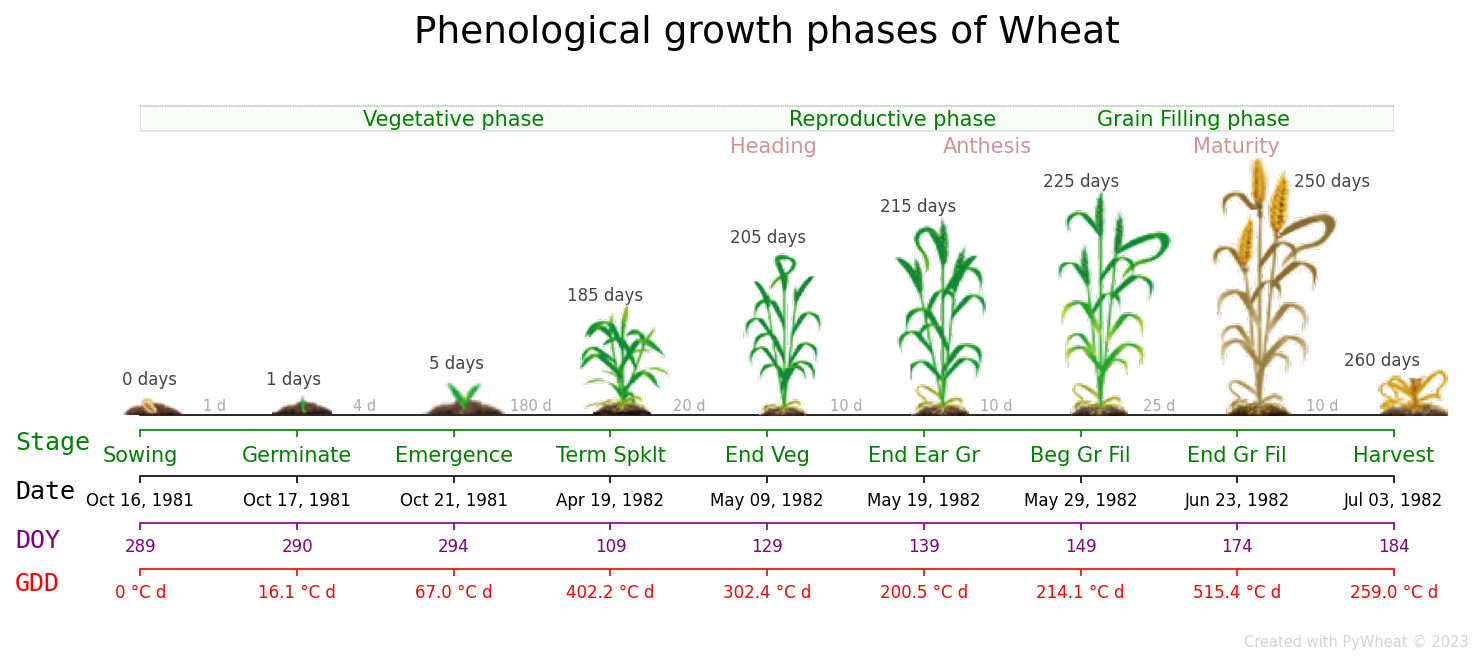

In [5]:
# Using option dispFigPhenology=True
growstages = determine_phenology_stage(initparams=params, weather=data['Weather'], 
                                       dispDates=True, dispFigPhenology=True, verbose=False)


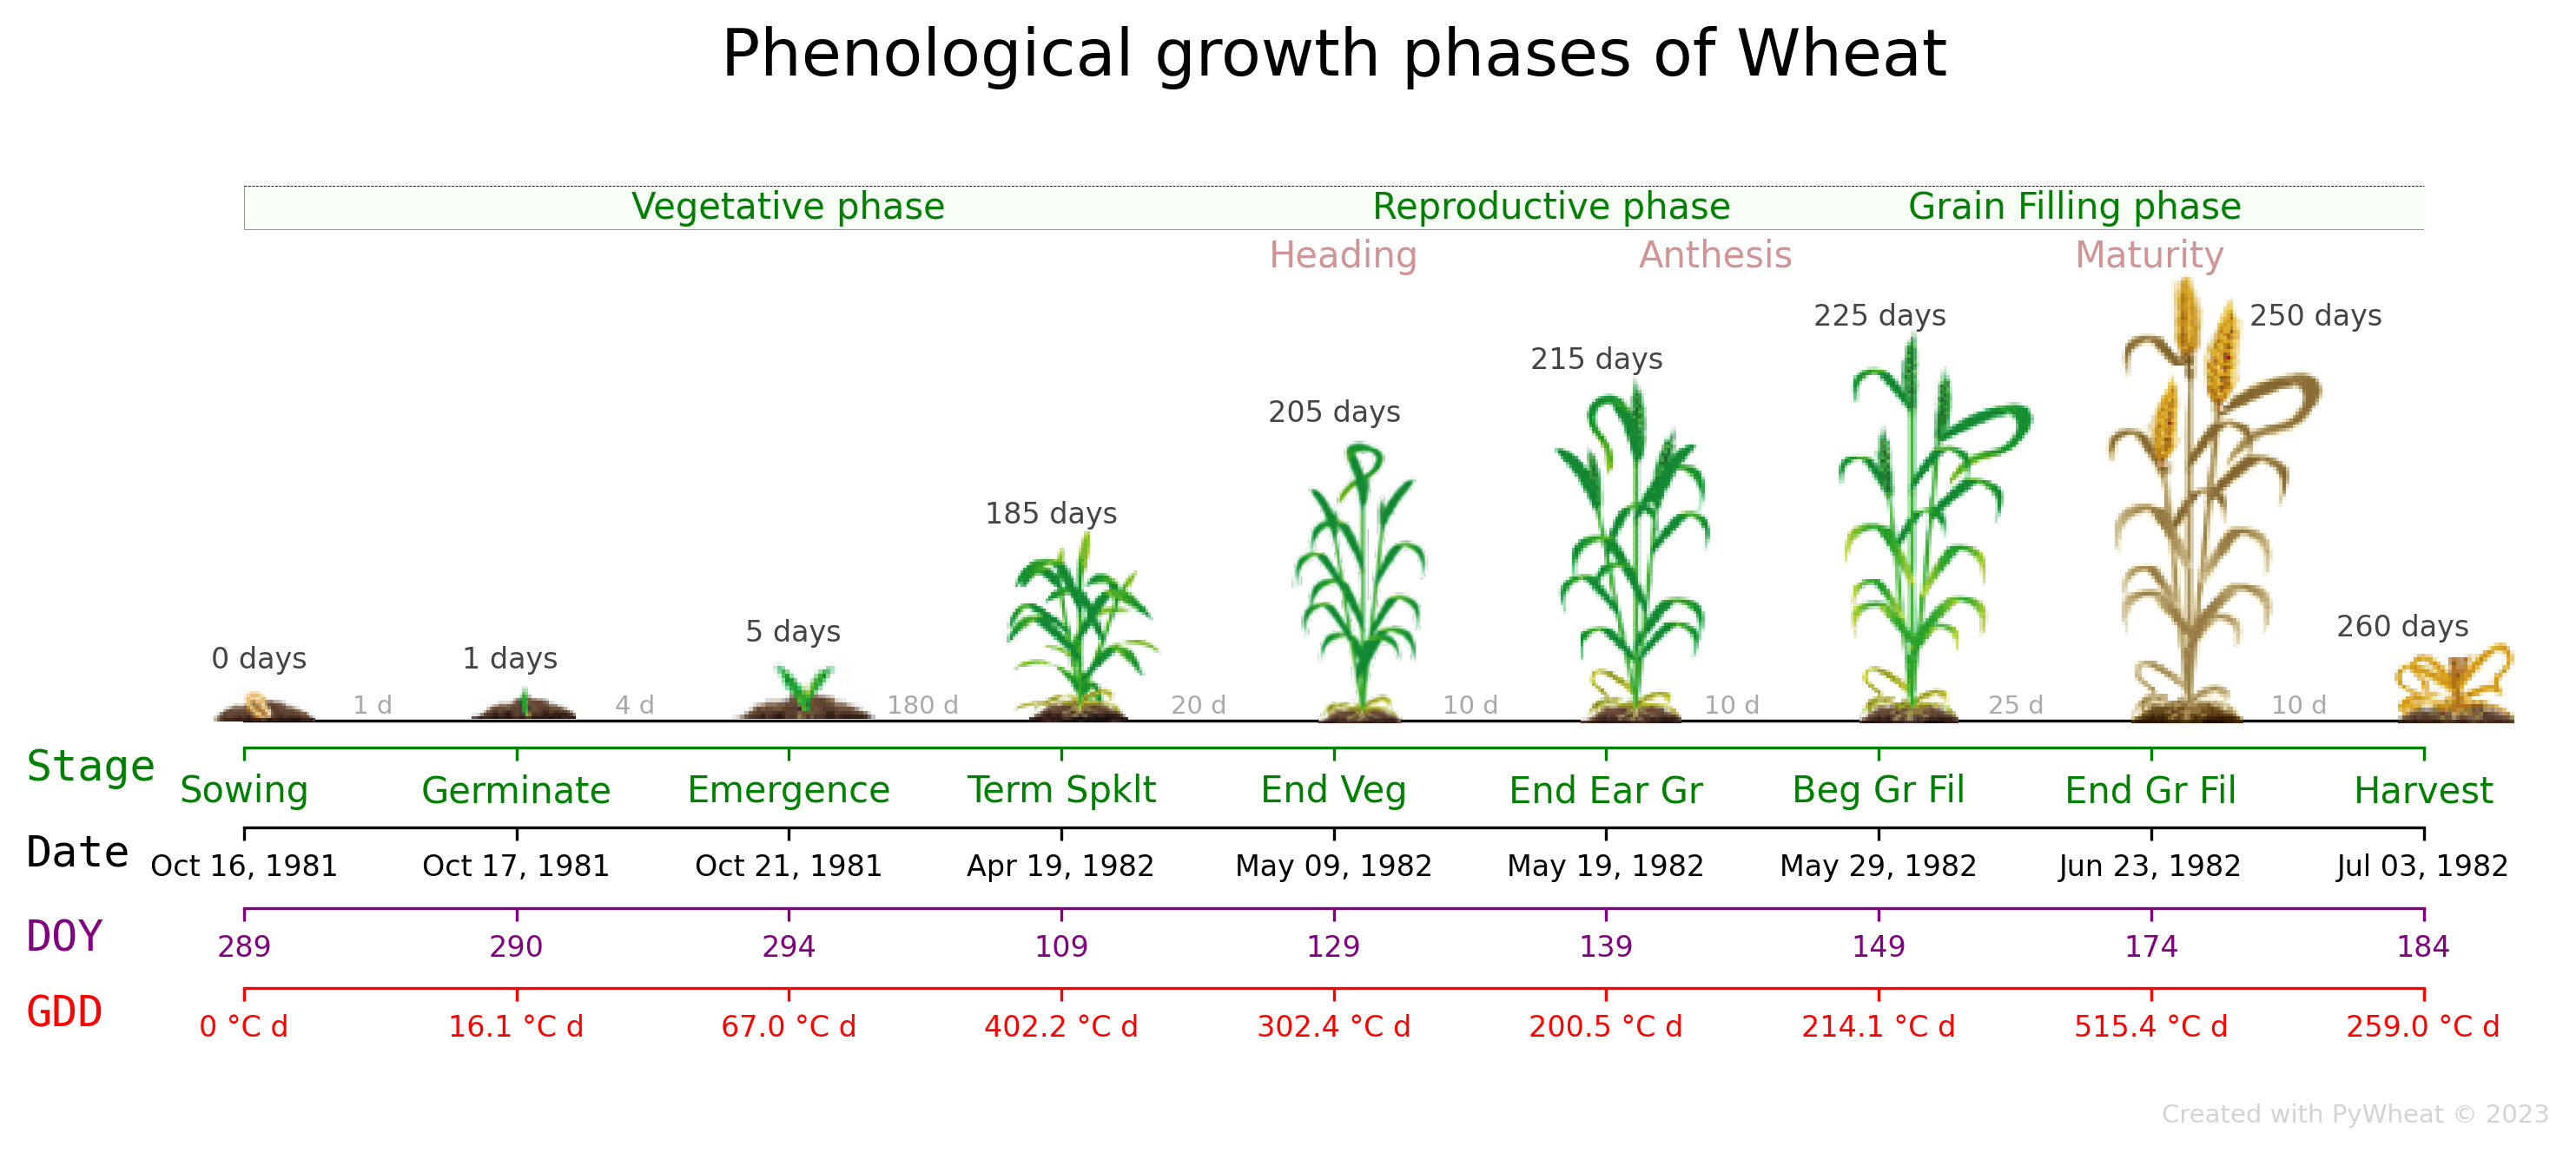

In [6]:
# Loading Utils module to customise
from pywheat.utils import drawPhenology

drawPhenology(gs=growstages, title='Phenological growth phases of Wheat', dpi=300,
             dispPlants=True, topDAPLabel=True, timeSpanLabel=True, topNameStageLabel=True,
             topNameStageLabelOpt=True, copyrightLabel=True, 
             saveFig=True, showFig=True, path_to_save_results='/Users/ernestogiron/Downloads/', 
             fname='Fig_1_Phenological_Phases_Wheat_v2', fmt='jpg')